In [1]:
import numpy
import math 

# importing libraries

def in_circle(x, y):
    return (x*x + y*y) <= 1

# making function to create an area inside the circle - to count darts which went inside of the circle.

def throwing_dart(n, verbose=False):
    count_in = 0
    pi_estimate = 0
    interval = n/10
    list_of_pis = []
    
# making function to simulate dart trowing, and creating variables and a list.
    
    for throw_number in range(1, n):
            
        x = numpy.random.uniform(-1,1)
        y = numpy.random.uniform(-1,1)

# making a square area outside of the circle.
        
        if in_circle(x, y):

            count_in += 1
            pi_estimate = (count_in / throw_number) * 4
            list_of_pis.append(pi_estimate)
            
# making a condition to count darts inside of the circle and estimations of Pi number, and adding Pi estimations to the list. 

        if throw_number % interval == 0:

            if verbose:
            
                print("Intermediate estimate of Pi after {} darts: {:.16f}".format(throw_number, pi_estimate))

# printing intermediate estimations of Pi every n/10 interval if verbose=True.

    if verbose:
    
        print("\n Final estimate of Pi after {} darts: {:.16f} \n ".format(n, pi_estimate))
            
    return(pi_estimate, list_of_pis)

# printing final estimate of Pi every n/10 interval if verbose=True.

pi_estimate, list_of_intermediates_k = throwing_dart(1000, verbose=True) 
pi_estimate, list_of_intermediates_m = throwing_dart(1000000, verbose=True)

# making two lists of Pi estimations for 1,000 and 1,000,000 dart throws respectevly.

Intermediate estimate of Pi after 100 darts: 3.0400000000000000
Intermediate estimate of Pi after 200 darts: 3.0800000000000001
Intermediate estimate of Pi after 300 darts: 3.0533333333333332
Intermediate estimate of Pi after 400 darts: 3.1299999999999999
Intermediate estimate of Pi after 500 darts: 3.1280000000000001
Intermediate estimate of Pi after 600 darts: 3.1452420701168613
Intermediate estimate of Pi after 700 darts: 3.1828571428571428
Intermediate estimate of Pi after 800 darts: 3.1650000000000000
Intermediate estimate of Pi after 900 darts: 3.1555555555555554

 Final estimate of Pi after 1000 darts: 3.1311311311311312 
 
Intermediate estimate of Pi after 100000 darts: 3.1288712887128871
Intermediate estimate of Pi after 200000 darts: 3.1367200000000000
Intermediate estimate of Pi after 300000 darts: 3.1404666666666667
Intermediate estimate of Pi after 400000 darts: 3.1405200000000000
Intermediate estimate of Pi after 500000 darts: 3.1422560000000002
Intermediate estimate of P

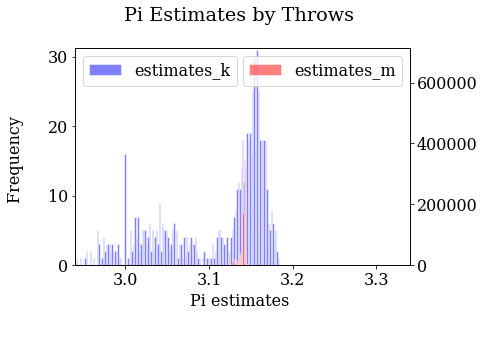

In [2]:
estimates_k = numpy.array(list_of_intermediates_k)
estimates_m = numpy.array(list_of_intermediates_m)
a = len(estimates_k)
b = len(estimates_m)

# making new variables and arrays out of the two lists of Pi estimations for 1,000 and 1,000,000 dart throws respectevly.

from matplotlib import pyplot
from matplotlib import rcParams

# importing libraries.

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
fig, ax1 = pyplot.subplots()
ax1.hist(estimates_k, bins=1000, alpha=0.5, color='blue', histtype='bar', edgecolor='white') 
ax1.set_ylabel('Frequency \n')
ax1.legend(['estimates_k'], loc="upper left")
ax1.set_ylim(0,a/25)
ax1.set_xlabel('Pi estimates \n')

# stating font and characteristics of a chart, and making one of the axis and a bar chart from the first array.

ax2 = ax1.twinx()
ax2.hist(estimates_m, bins=1000, alpha=0.5, color='red', histtype='bar', edgecolor='white')
ax2.grid(False)
ax2.legend(['estimates_m'], loc="upper right")
ax2.set_ylim(0,b/1.1)
pyplot.title('Pi Estimates by Throws \n')
pyplot.xlim(left=2.94, right=3.34);

# making the other axis and a bar chart from the second array, and stating characteristics of the second chart.
# it shows that 1,000,000 dart throws' estimations are much closer to Pi than 1,000 dart throws' estimations.

In [3]:
estimates_k_mean = numpy.mean(estimates_k)
estimates_m_mean = numpy.mean(estimates_m)
print('The mean value for estimates_k is {:.5f} and for estimates_m {:.5f}'.format(estimates_k_mean, estimates_m_mean))

# taking means from the arrays and printing them.
# they show that average of 1,000,000 dart throws' estimations is much closer to Pi.

The mean value for estimates_k is 3.10055 and for estimates_m 3.14023


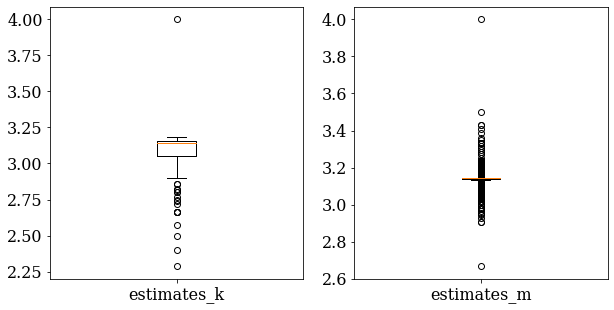

In [4]:
fig, axes = pyplot.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].boxplot(estimates_k, labels=['estimates_k']) 
axes[1].boxplot(estimates_m, labels=['estimates_m']);

# making box plots for two arrays, and putting plots side by side.
# it shows how far are the estimations from Pi.

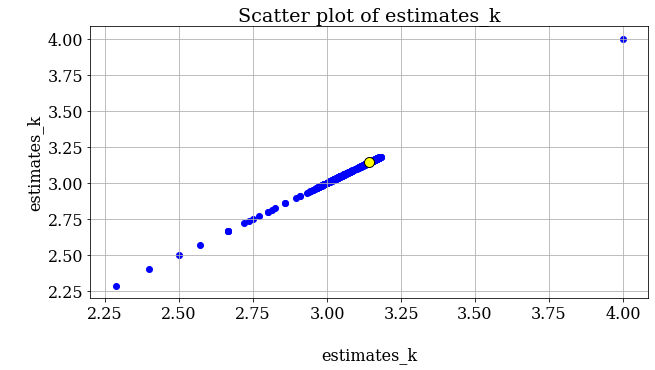

In [5]:
pyplot.figure(figsize=(10,5))
pyplot.scatter(estimates_k, estimates_k, color='blue') 
pyplot.title('Scatter plot of estimates_k')
pyplot.xlabel('\nestimates_k')
pyplot.ylabel('\nestimates_k')
x = [math.pi]
y = [math.pi]
pyplot.grid()
pyplot.plot(x, y, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="yellow");

# making scatter plot for the first array, giving it different characteristics, and pointing Pi value.
# it shows how far are the estimations from Pi.

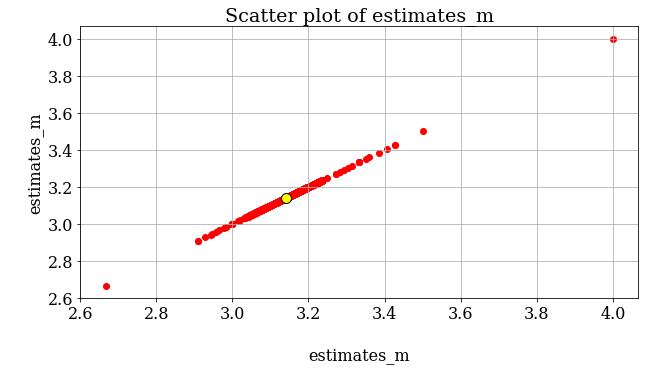

In [6]:
pyplot.figure(figsize=(10,5))
pyplot.scatter(estimates_m, estimates_m, color='red') 
pyplot.title('Scatter plot of estimates_m')
pyplot.xlabel('\nestimates_m')
pyplot.ylabel('\nestimates_m')
x = [math.pi]
y = [math.pi]
pyplot.grid()
pyplot.plot(x, y, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="yellow");

# making scatter plot for the second array, giving it different characteristics, and pointing Pi value.
# it shows how far are the estimations from Pi.

In [7]:
k = 1000
m = 1000000
avg_estimates_k = []
avg_estimates_m = []

# making new lists and variables.
    
from scipy import stats

# importing the library.

stat, estimates_k_repeat = stats.normaltest(list_of_intermediates_k)
stat, estimates_m_repeat = stats.normaltest(list_of_intermediates_m)

# calculating p-value for both of the Pi estimation lists.

alpha = 0.01

# taking usual threshold for rejection of null hypothesis. (it could be also 0.05 by tradition)

print("p-value for normality on the 1,000 darts throws = {}".format(estimates_k_repeat))
if estimates_k_repeat < alpha:
    print("The null hypothesis can be rejected, i.e. this sample likely did NOT come from a Normal distribution")
else:
    print("The null hypothesis cannot be rejected, i.e. this sample likely comes from a Normal distribution")

print()

# making condition for the rejection of the null hypothesis for the 1,000 dart throws' estimations - that data, which we used, is normally distrbuted, and printing the result.

print("p-value for normality on the 1,000,000 darts throws = {}".format(estimates_m_repeat))
if estimates_m_repeat < alpha:
    print("The null hypothesis can be rejected, i.e. this sample likely did NOT come from a Normal distribution")
else:
    print("The null hypothesis cannot be rejected, i.e. this sample likely comes from a Normal distribution")

print()  

# making condition for the rejection of the null hypothesis for the 1,000,000 dart throws' estimations - that data, which we used, is normally distrbuted, and printing the result.

p-value for normality on the 1,000 darts throws = 7.796717744062463e-92
The null hypothesis can be rejected, i.e. this sample likely did NOT come from a Normal distribution

p-value for normality on the 1,000,000 darts throws = 0.0
The null hypothesis can be rejected, i.e. this sample likely did NOT come from a Normal distribution

